## **Details**
<b>Task</b> - Predicting student marks based on the number of hours they studied using Linear Regression<br/>
<b>Author</b> - Suraj Krishnamoorthy (Data Science and Business Analysis Intern)

### 1. Import required libraries

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### 2. Import dataset from URL

In [2]:
url = r"http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
print("First 5 rows")
df.head(5)

First 5 rows


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
print("Last 5 rows")
df.tail(5)

Last 5 rows


,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### 3. Data VIsualization

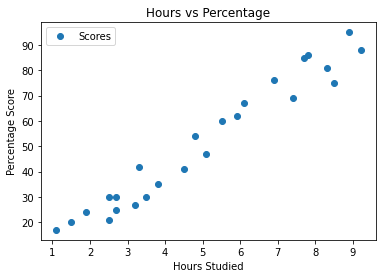

In [5]:
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

The plot clearly shows a popsitive linear correlation between hours studied and percentage marks scored.

### 4. Data Preparation and Preprocessing

In [6]:
# Fetching the independent and dependent attributes
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [7]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) 
score_predictor = LinearRegression()  
score_predictor.fit(X_train, y_train) 

print("Model training successful")

Model training successful


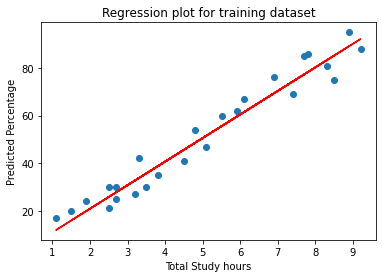

In [8]:
# Plotting the regression line
reg_line = score_predictor.coef_*X+score_predictor.intercept_
plt.scatter(X, y)
plt.plot(X, reg_line, color='red');
plt.title('Regression plot for training dataset')
plt.xlabel('Total Study hours')
plt.ylabel('Predicted Percentage')
plt.show()

### 5. Making Predictions

In [9]:
y_pred = score_predictor.predict(X_test)
print(X_test, '\n')
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]] 

[15.9477618  32.77394723 74.344523   25.84551793 59.49788879 38.71260091
 19.90686425 78.30362545 69.39564493 11.98865934]


### 6. Comparing Actual and Predicted values

In [10]:
df_output_values = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_output_values

,Actual,Predicted
0,20,15.947762
1,27,32.773947
2,69,74.344523
3,30,25.845518
4,62,59.497889
5,35,38.712601
6,24,19.906864
7,86,78.303625
8,76,69.395645
9,17,11.988659


### 7. Evaluating model performance

In [11]:
## Training and Testing score
print('Training Score: ', score_predictor.score(X_train, y_train))
print('Test Score: ', score_predictor.score(X_test, y_test))

Training Score:  0.9440108159733135
Test Score:  0.956640847232559


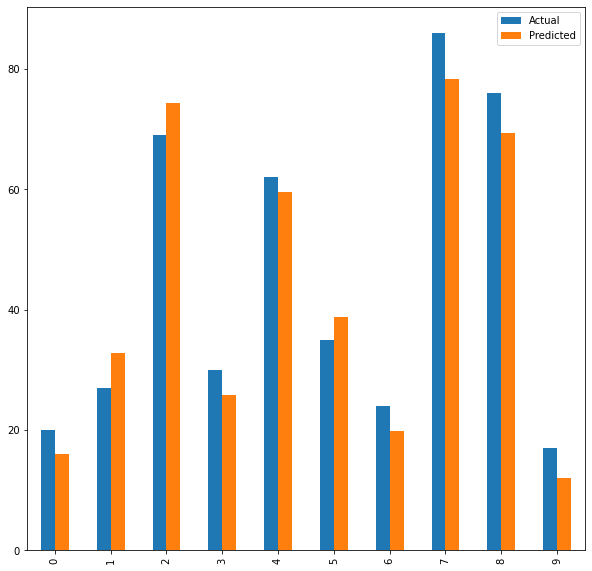

In [12]:
## Plotting the predicted values against the actual values
df_output_values.plot(kind='bar', figsize=(10,10))
plt.show()

### 8. Getting custom user input

In [13]:
hours = float(input("Enter number of study hours: "))
result = np.array([hours]).reshape(-1, 1)
own_pred = score_predictor.predict(result)
print("No of Hours = {}".format(hours))
print("Predicted percentage = {}".format(own_pred[0]))

Enter number of study hours: 9.25
No of Hours = 9.25
Predicted percentage = 92.65537184734602


### 9. Evaluating Model Efficiency

In [14]:
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score: ', metrics.r2_score(y_test, y_pred))

Mean Squared Error:  26.034569687682243
Mean Absolute Error:  4.894510863410609
RMSE:  5.102408224327238
R2 Score:  0.956640847232559


## Task Completed